In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df  = pd.read_csv('/content/drive/MyDrive/titanic_train_data.csv')

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# In any dataset there are three type of missing value are present.
1.MCAR(Missing completely at random)
2.MAR(miss at random)
3.MNAR (missing not at random)

link:https://en.wikipedia.org/wiki/Missing_data

In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

mean/median/mode imputaion:
used in MCAR missing type value

In [5]:

def imputation_missing(data,variable,tendency):
  data[variable+'_median'] = data[variable].fillna(tendency)

In [6]:
tendency = df['Age'].median()

In [7]:
imputation_missing(df,'Age',tendency)

In [8]:
df['Age_median'].isnull().sum()

0

In [9]:
# now check the variation of the age column and age_median column
print(df['Age'].std())
print(df['Age_median'].std())

14.526497332334044
13.019696550973194


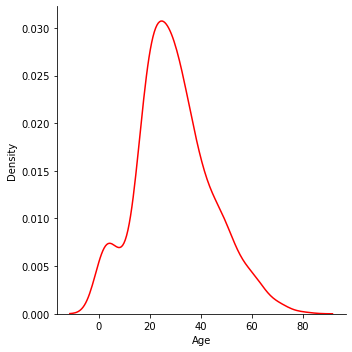

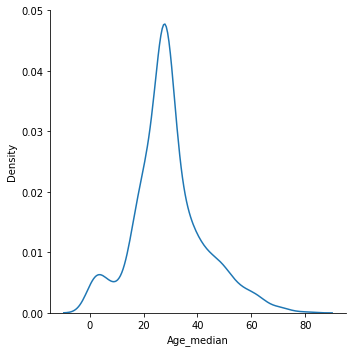

In [10]:

sns.displot(data = df,x=df['Age'],kind='kde',color = 'r' )
sns.displot(data = df,x=df['Age_median'],kind='kde' )

(array([0.00761574, 0.00648748, 0.0249627 , 0.04879715, 0.0166418 ,
        0.00987226, 0.00634645, 0.00338477, 0.00126929, 0.00028206]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <a list of 10 Patch objects>)

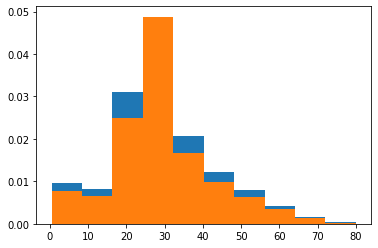

In [11]:
fig,ax = plt.subplots()
ax.hist(x = df['Age'],density =True)
ax.hist(x = df['Age_median'],density =True)

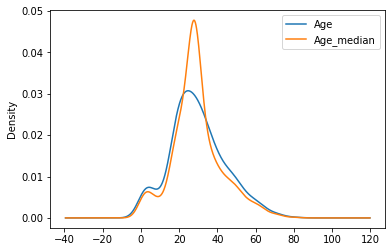

In [12]:
hp = df[['Age','Age_median']]
hp.plot.kde()

## capturing NaN values with a new feature

In [13]:
def random_imputation(data,variable,median):
  data[variable+'_median'] = data[variable].fillna(median)
  data[variable+'_random']=data[variable]
  ##genertaing the random sample
  random_sample = data[variable].dropna().sample(data[variable].isnull().sum(),random_state =0)
  random_sample.index = data[data[variable].isnull()].index
  data[variable+'_random'] = data[variable+'_random'].fillna(random_sample)



In [14]:
median = df['Age'].median()
random_imputation(df,'Age',median)

In [15]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_median,Age_random
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,27.0,27.0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,19.0,19.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,28.0,15.0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,26.0,26.0


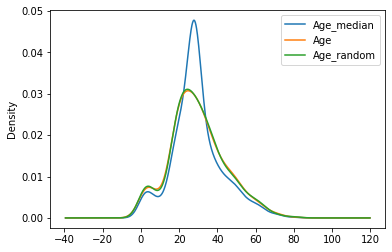

In [16]:
### plotting the distribution:
df1 = df[['Age_median','Age','Age_random']]
df1.plot.kde()


## capturing NaN values with a new feature
in this technique we create a new feature and in that particular feature we will create 0 and 1 as its value. zero will show nan value and 1 will show not null value and then impute in mean/median/mode in original missing value columnn.
 Disadvantage: leads to curse of dimensionality

In [17]:
def capturing_nan(data,variable,impute):
  data[variable+'_NaN'] = np.where(data[variable].isnull(),1,0)
  
  

value = df['Age'].median()

In [18]:
capturing_nan(df,'Age',value)

In [19]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_median,Age_random,Age_NaN
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,22.0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,38.0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0,26.0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0,35.0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0,35.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,27.0,27.0,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,19.0,19.0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,28.0,15.0,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,26.0,26.0,0


In [20]:
df['Age'].isnull().sum()

177

End of distribution imputation
in this technique we use value which is far away from the distribution to the right side.ie after 3rd deviation.

In [21]:
value = df['Age'].mean()+3*df['Age'].std()
def end_distribution(data,variable,endvalue):
  data[variable+'_end_val'] = data[variable].fillna(endvalue)

In [22]:
end_distribution(df,'Age',value )

In [23]:
 df['Age'].mean()+3*df['Age'].std()

73.27860964406095

In [24]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_median,Age_random,Age_NaN,Age_end_val
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,22.0,0,22.00000
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,38.0,0,38.00000
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0,26.0,0,26.00000
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0,35.0,0,35.00000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0,35.0,0,35.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,27.0,27.0,0,27.00000
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,19.0,19.0,0,19.00000
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,28.0,15.0,1,73.27861
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,26.0,26.0,0,26.00000


{'boxes': [<matplotlib.lines.Line2D at 0x7f8eecfb6e50>,
 'caps': [<matplotlib.lines.Line2D at 0x7f8eecfbd1d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f8eecfc4710>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f8eecfc41d0>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f8eecfbd190>,
  <matplotlib.lines.Line2D at 0x7f8eecf73ad0>]}

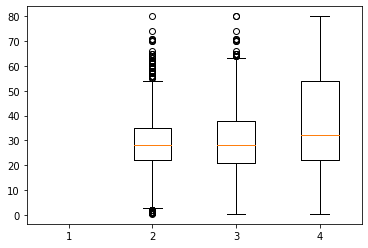

In [25]:
data = [df['Age'],df['Age_median'],df['Age_random'],df['Age_end_val']]
fig = plt.figure()
ax = fig.add_subplot(111)
ax.boxplot(data)

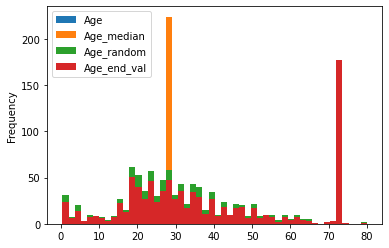

In [26]:
df[['Age','Age_median','Age_random','Age_end_val']].plot.hist(bins = 50)